<a href="https://colab.research.google.com/github/Ani3103/Prasunet_ML_01-02-03/blob/main/Houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBERARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# **Data Loading and Analysis**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
dataset = pd.read_csv("/content/1553768847-housing.csv")

In [12]:
dataset


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<ipython-input-74-2abc3c2b0e78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

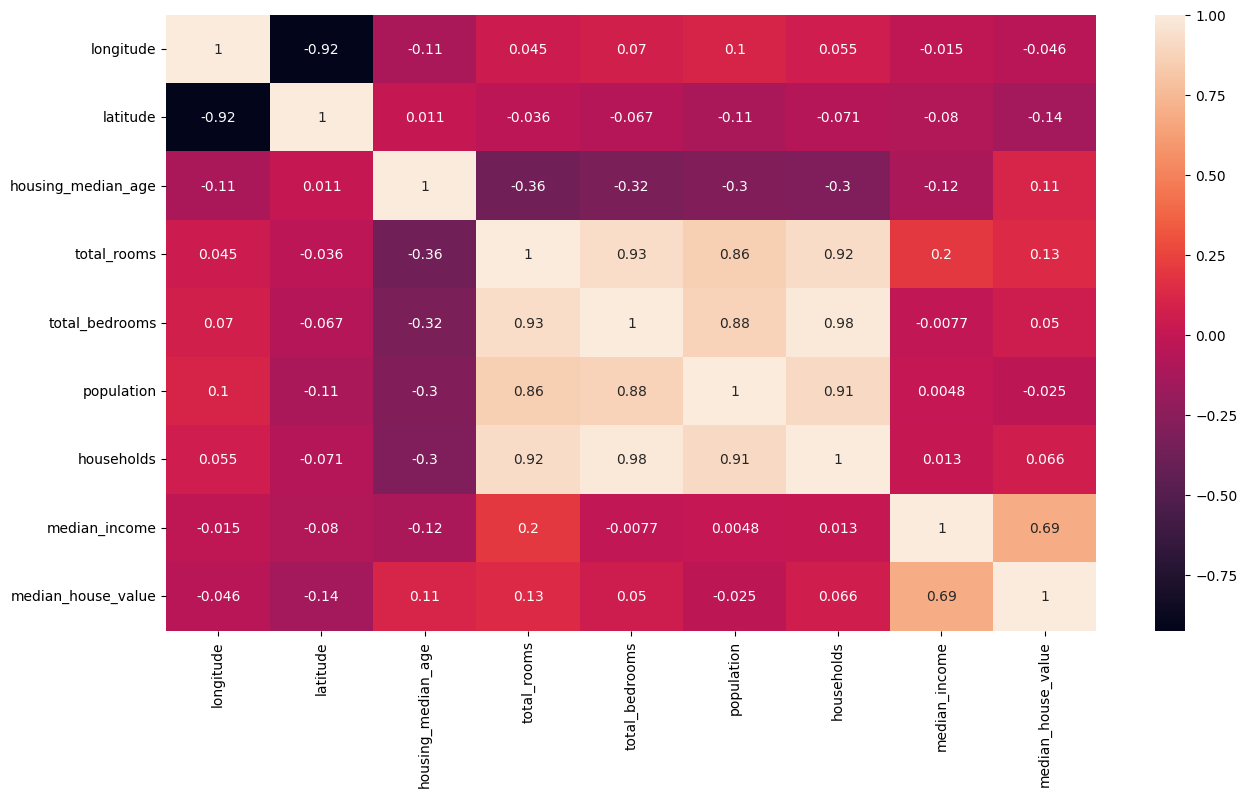

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

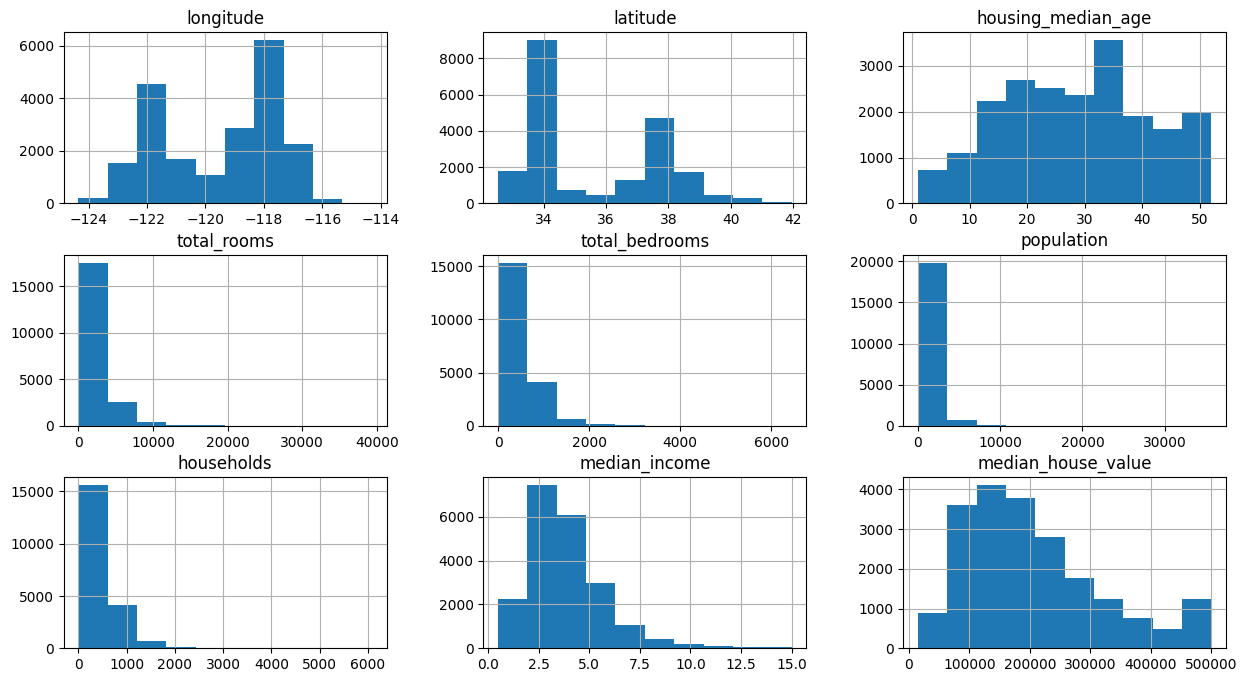

In [ ]:
dataset.hist(figsize = (15,8))

## **DATA PREPROCESSING**

In [ ]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
dataset['total_bedrooms']=dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean())
#dataset.dropna(inplace = True)
dataset.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [ ]:

#dataset = dataset.join(pd.get_dummies(dataset.ocean_proximity)).drop(["ocean_proximity","ISLAND"],axis = 1)

dataset["ocean_proximity"].replace(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],[0,1,2,3,4], inplace=True)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,342200


# **Splitting test train**

In [ ]:
from sklearn.model_selection import train_test_split

   # independent variable
X = dataset.drop(["median_house_value"],axis=1)

   # dependent variable
Y = dataset["median_house_value"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
train_data = X_train.join(Y_train)

# **TRAIN DATA**

<Axes: >

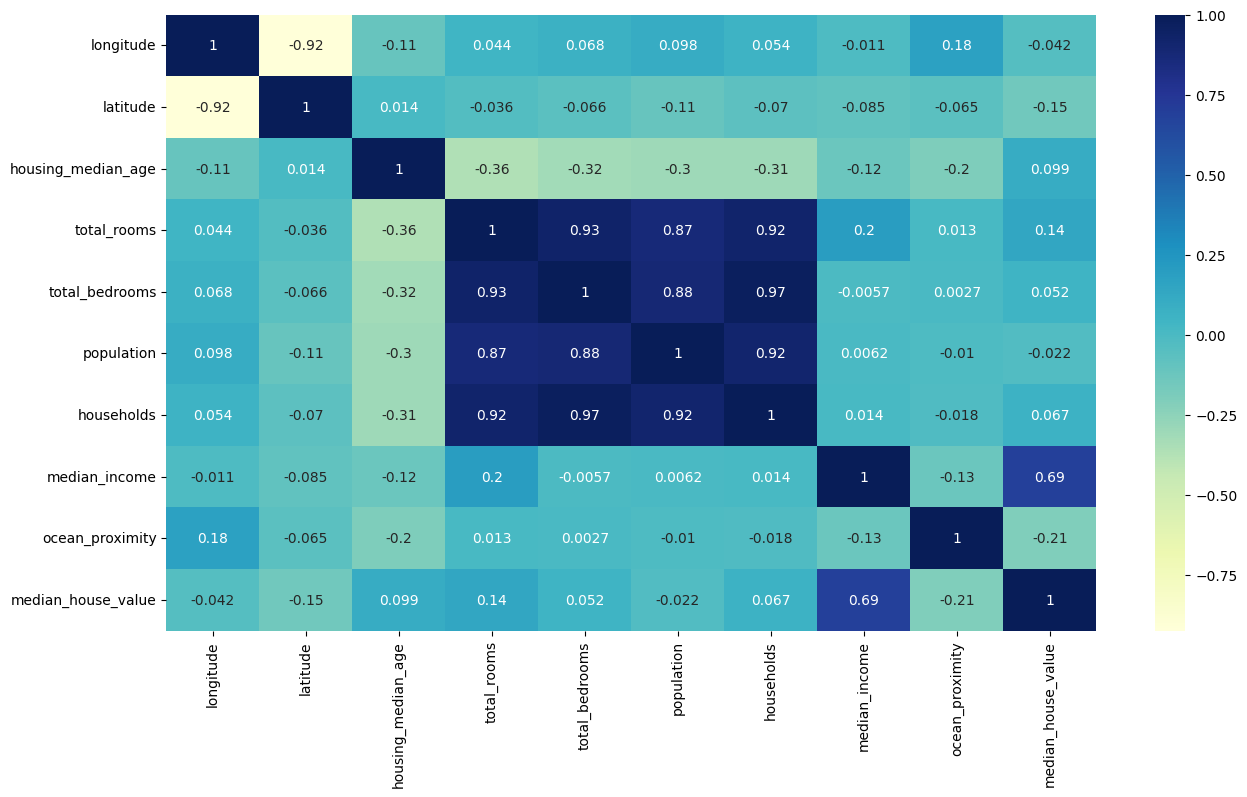

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] =np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] =np.log(train_data['total_bedrooms'] + 1)
train_data['population'] =np.log(train_data['population'] + 1)
train_data['households'] =np.log(train_data['households'] + 1)


In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_ratio'] = train_data['total_rooms'] / train_data['households']

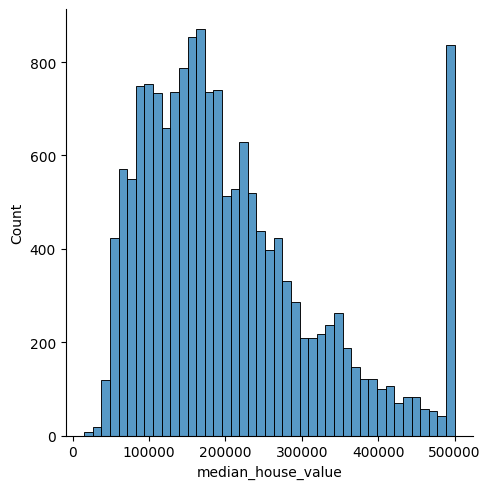

In [ ]:
sns.displot(train_data['median_house_value'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'households_ratio'}>]], dtype=object)

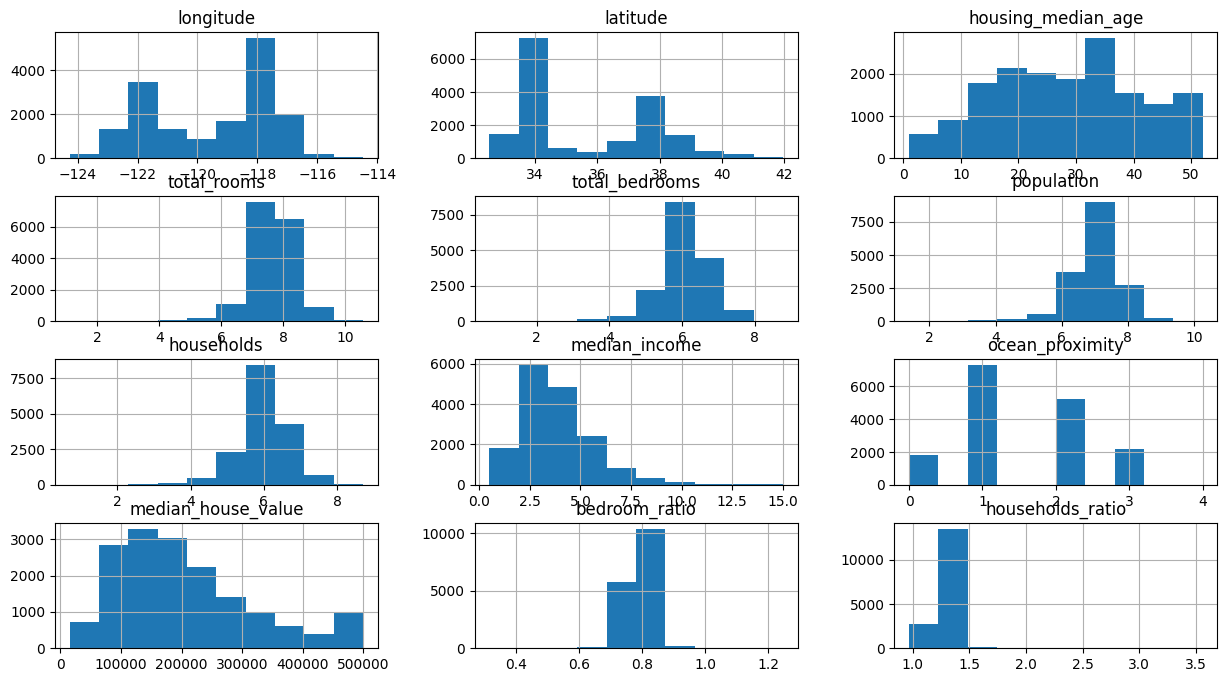

In [ ]:
train_data.hist(figsize = (15,8))

# **Model building**

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, Y_train = train_data.drop(['median_house_value'],axis = 1),train_data['median_house_value']

lr= LinearRegression()
lr.fit(X_train, Y_train)



LinearRegression()

# **TEST DATA**

In [ ]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] =np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] =np.log(test_data['total_bedrooms'] + 1)
test_data['population'] =np.log(test_data['population'] + 1)
test_data['households'] =np.log(test_data['households'] + 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_ratio'] = test_data['total_rooms'] / test_data['households']

X_test, Y_test = test_data.drop(['median_house_value'],axis = 1),test_data['median_house_value']

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,households_ratio
17609,-121.92,37.29,34,6.850126,4.912655,5.937536,4.941642,5.1765,1,344600,0.717163,1.386204
18367,-122.01,37.18,37,8.256607,6.481577,7.336286,6.342121,5.8596,1,318700,0.785017,1.301868
13718,-117.19,34.08,5,8.402680,6.622736,7.780303,6.651572,4.5938,2,126500,0.788170,1.263262
10511,-117.69,33.53,17,8.525558,6.658011,7.781973,6.687109,6.0868,1,282900,0.780947,1.274924
16784,-122.45,37.69,17,7.766417,6.218600,6.785588,6.224558,3.0625,3,87500,0.800704,1.247706
...,...,...,...,...,...,...,...,...,...,...,...,...
10383,-117.64,33.62,16,8.286773,6.648985,7.092574,6.599870,3.4115,1,184800,0.802361,1.255596
427,-122.27,37.88,44,7.720018,6.385194,6.897705,6.311735,3.0132,0,272900,0.827096,1.223121
15674,-122.44,37.80,52,7.380256,6.190315,6.590301,6.142037,3.9856,0,500001,0.838767,1.201597
11076,-117.85,33.81,32,7.477038,5.777652,6.776507,5.802118,4.0417,1,234500,0.772719,1.288674


In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,households_ratio
16220,-121.35,37.97,33,8.204398,6.525030,7.437795,6.510258,3.1406,2,93900,0.795309,1.260226
3734,-118.40,34.19,30,6.257668,4.844187,5.726848,4.867534,4.1125,1,216700,0.774120,1.285593
10839,-117.93,33.66,18,7.622664,5.525453,6.555357,5.509388,9.6062,1,414700,0.724872,1.383577
7483,-118.22,33.93,30,6.095825,5.141664,6.806829,5.247024,2.1964,1,125000,0.843473,1.161768
2231,-119.78,36.84,7,8.498622,6.981006,7.608374,6.813445,3.2147,2,111900,0.821428,1.247331
...,...,...,...,...,...,...,...,...,...,...,...,...
109,-122.25,37.82,28,8.113127,6.752270,7.327123,6.688355,3.9063,0,225000,0.832265,1.213023
13187,-117.70,34.08,10,7.590852,6.120297,7.019297,5.966147,3.7802,2,107300,0.806273,1.272321
16431,-121.32,38.15,5,8.599510,6.902743,7.910591,6.805723,3.9323,2,130100,0.802690,1.263570
6906,-118.13,34.04,42,7.698936,6.113682,7.239215,6.049733,4.3646,1,211400,0.794094,1.272608


# **Evaluvation**

In [ ]:
lr.score(X_test, Y_test)

0.673207629420411

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([163668.92930881, 241767.16239795, 422044.86834615, ...,
       147235.29689177, 235548.2322936 ,  56560.96333143])

In [ ]:
#Evaluvation: MAE,MSE,RMSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('The Mean Absolute Error(MAE) is: ', mean_absolute_error(Y_test,y_pred))
print('The Mean Square Error(MSE) is: ', mean_squared_error(Y_test,y_pred))
print('The Root Mean Square Error(RMSE) is: ', np.sqrt(mean_squared_error(Y_test,y_pred)))

The Mean Absolute Error(MAE) is:  48287.568366666215
The Mean Square Error(MSE) is:  4312120776.899581
The Root Mean Square Error(RMSE) is:  65666.74026399956


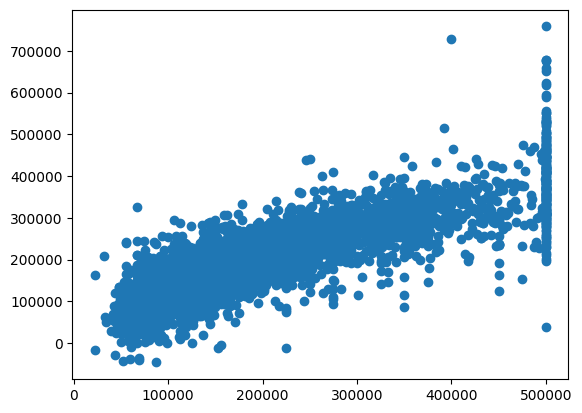

In [ ]:
plt.scatter(Y_test,y_pred)